# Assignment 03

Submitted by : Group - Kay
Members:
1. Charu Gupta (220202389)
2. Priya Yadav (220200937)
3. Venkatesh Hariharapura Shivashankar (220200713)
4. Vibha Iyer (220200717)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Feature values
x1 = np.array([1.1,2.2,2.5,4,5.2,6.1]) # first feature
x2 = np.array([1.4,2.1,2.9,5,5.1,6.7]) # second feature
assert len(x1) == len(x2)

In [3]:
# Combine features to data matrix
mat = np.array([x1, x2]).transpose()
print(mat)

[[1.1 1.4]
 [2.2 2.1]
 [2.5 2.9]
 [4.  5. ]
 [5.2 5.1]
 [6.1 6.7]]


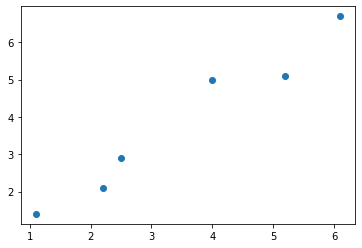

In [4]:
# Plot the data
plt.scatter(mat[:,0], mat[:,1])
plt.show()

In [5]:
# Standardize the features
mean1 = np.mean(mat[:,0])
std1 = np.std(mat[:,0])
mean2 = np.mean(mat[:,1])
std2 = np.std(mat[:,1])
z_mat = np.zeros(mat.shape)
z_mat[:,0] = (mat[:,0] - mean1) / std1
z_mat[:,1] = (mat[:,1] - mean2) / std2
print(z_mat)

[[-1.38195552 -1.31932673]
 [-0.75292749 -0.9449232 ]
 [-0.58137439 -0.51703345]
 [ 0.2763911   0.60617714]
 [ 0.9626035   0.65966336]
 [ 1.4772628   1.51544286]]


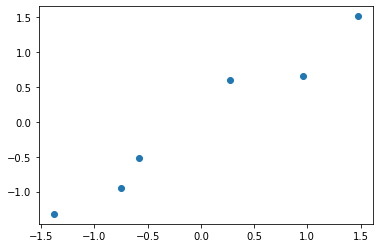

In [6]:
# Plot the standardized data
plt.scatter(z_mat[:,0], z_mat[:,1])
plt.show()

In [7]:
# Compute the covariance matrix
covariance_mat = np.cov(z_mat.transpose())
print(covariance_mat)

[[1.2        1.17530862]
 [1.17530862 1.2       ]]


In [8]:
 # Compute the eigendecomposition
eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)
print("Eigenvectors: \n", eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

Eigenvalues: 
 [2.37530862 0.02469138] 



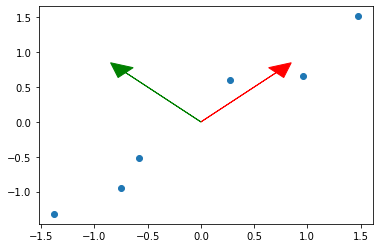

In [9]:
# Plot of standarized data and eigenvectors
plt.scatter(z_mat[:,0], z_mat[:,1])
plt.arrow(0, 0, eigen_vectors[0,0], eigen_vectors[1,0], color='r',
          head_width=0.2, head_length=0.2)
plt.arrow(0, 0, eigen_vectors[0,1], eigen_vectors[1,1], color='g',
          head_width=0.2, head_length=0.2)
plt.show()

## Task 1.1: Application of PCA (30 points)

[-1.910095   -1.20056174 -0.77669163  0.62406999  1.1471159   2.11616247]


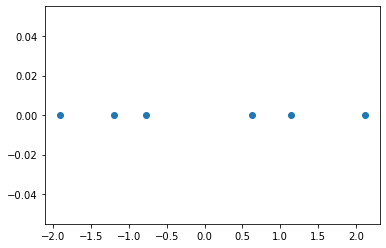

In [10]:
# TODO. See assignment sheet for instructions.

#Transpose the eigen vectors
eigen_vectors1 = eigen_vectors.transpose()

#Sorting eigen values and corresponding eigen vectors in descending order
idxs = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idxs]
eigen_vectors1 = eigen_vectors1[idxs]

#calculating the projected matrix for highest 1st principle component
projected_Z = z_mat.dot(eigen_vectors1[0])
print(projected_Z)
#Plost of transformed data
y_axis = np.zeros(projected_Z.shape)
plt.scatter(projected_Z,y_axis)


## Task 1.2: Reconstruction of data (30 points)

In [11]:
# TODO. See assignment sheet for instructions.
eigen_vectors2=eigen_vectors.transpose()
new_mat=np.asmatrix(projected_Z).transpose().dot(np.asmatrix([eigen_vectors2[0]]))
recon_mat = np.array(new_mat)
print(recon_mat)
recons_mat = np.zeros(recon_mat.shape)
#To add mean and multiply with standard deviation to get reconstructed data
recons_mat[:,0] = (recon_mat[:,0]*std1) + mean1
recons_mat[:,1] = (recon_mat[:,1]*std2) + mean2 
print("Reconstructed matrix:")
print(recons_mat)    

[[-1.35064113 -1.35064113]
 [-0.84892534 -0.84892534]
 [-0.54920392 -0.54920392]
 [ 0.44128412  0.44128412]
 [ 0.81113343  0.81113343]
 [ 1.49635283  1.49635283]]
Reconstructed matrix:
[[1.15476042 1.34145333]
 [2.03212571 2.27948147]
 [2.55625746 2.83985278]
 [4.28835332 4.69170933]
 [4.93511979 5.38319458]
 [6.1333833  6.66430851]]


## Task 1.3: Plotting of data (20 points)

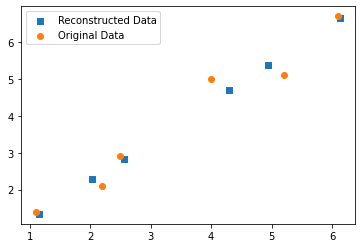

In [12]:
# TODO. See assignment sheet for instructions.
plt.scatter(recons_mat[:,0],recons_mat[:,1],marker=',',label='Reconstructed Data')
plt.scatter(mat[:,0], mat[:,1],label='Original Data')
plt.legend()
plt.show()

## Task 1.4: Error of PCA (20 points)

In [14]:
# TODO. See assignment sheet for instructions.
#Finding the sum of error induced by PCA by Euclidean Distance and Manhatten Distance
distanceForEuclidean=0
sumForEuclidean=0
sumForManha=0
for j in range(0,len(mat)):
    sumForEuclidean=sumForEuclidean+(((recons_mat[j][0]-mat[j][0])*(recons_mat[j][0]-mat[j][0]))+((recons_mat[j][1]-mat[j][1])*(recons_mat[j][1]-mat[j][1])))
    sumForManha=sumForManha+abs(recons_mat[j][0]-mat[j][0]) + abs((recons_mat[j][1]-mat[j][1]))
distanceForEuclidean=np.sqrt(sumForEuclidean)
print("Error induced by Euclidean distance is ",distanceForEuclidean)
print("Error induced by Manhatten distance is ",sumForManha)


#------------------error---------------------------
err=0
for i in range(mat.shape[0]):
    a=mat[i,:]
    b=recons_mat[i,:]
    err+=np.linalg.norm(a-b)
print("Correct error:",err)

Error induced by Euclidean distance is  0.6360378731166952
Error induced by Manhatten distance is  1.7908611002857535
Correct error: 1.2670368335684183
